Jennifer Zhang 

In [33]:
import math
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

from pandas import DataFrame
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from numpy import loadtxt, where
from pylab import scatter, show, legend, xlabel, ylabel
from ipykernel import kernelapp as app
from pandas import ExcelWriter
from pandas import ExcelFile

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestClassifier

In [34]:
df = pd.read_excel('default of credit card clients.xls', header = 1)

In [35]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [36]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [37]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [38]:
print("Shape of data:", df.shape)

Shape of data: (30000, 25)


In [39]:
print("Target:",df['default payment next month'])

Target: 0        1
1        1
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       1
14       0
15       0
16       1
17       0
18       0
19       0
20       0
21       1
22       1
23       1
24       0
25       0
26       1
27       0
28       0
29       0
        ..
29970    0
29971    0
29972    0
29973    1
29974    1
29975    0
29976    1
29977    0
29978    0
29979    0
29980    0
29981    0
29982    1
29983    0
29984    0
29985    0
29986    0
29987    0
29988    0
29989    0
29990    0
29991    1
29992    0
29993    0
29994    1
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default payment next month, Length: 30000, dtype: int64


<Figure size 432x432 with 0 Axes>

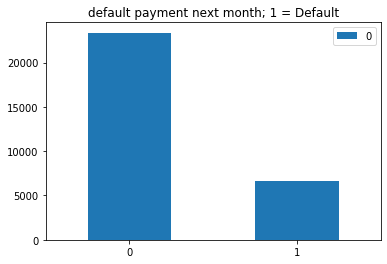

0.2212

In [40]:
plt.figure(figsize = (6,6))
temp = df['default payment next month'].value_counts()
index = ['0','1']
data = pd.DataFrame(temp.values, index=index)
ax = data.plot.bar(rot=0)
plt.title('default payment next month; 1 = Default')
plt.show()
sum(df['default payment next month']==1)/len(df['default payment next month'])

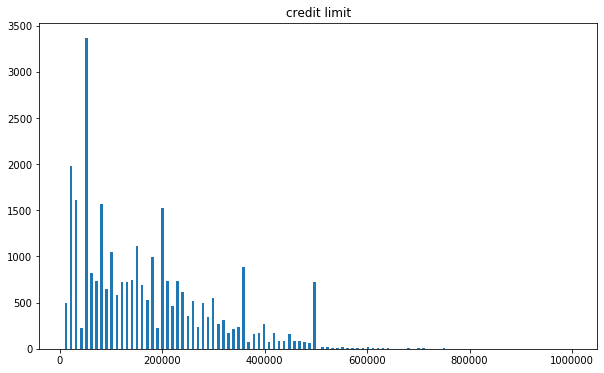

In [41]:
plt.figure(figsize = (10,6))
plt.hist(df['LIMIT_BAL'], bins = 200)
plt.title('credit limit')
plt.show()

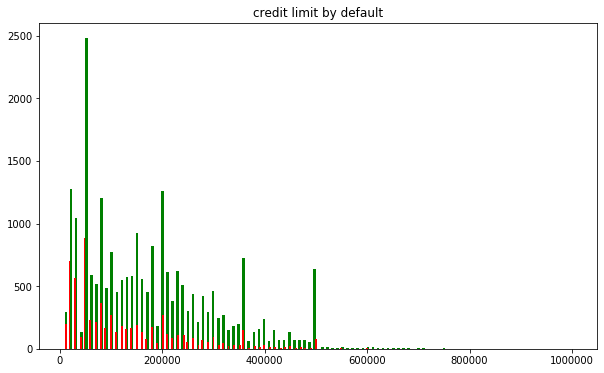

In [42]:
class_0 = df[df['default payment next month']==0]['LIMIT_BAL']
class_1 = df[df['default payment next month']==1]['LIMIT_BAL']
plt.figure(figsize = (10,6))
plt.hist(class_0, bins = 200, color = 'g')
plt.hist(class_1, bins = 200, color = 'r')
plt.title('credit limit by default')
plt.show()

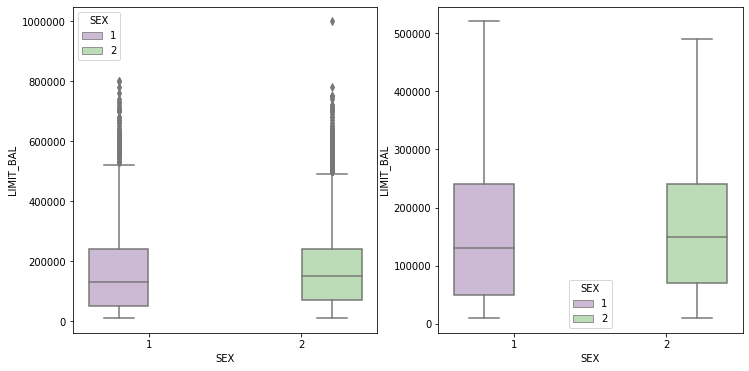

In [43]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="SEX", y="LIMIT_BAL", hue="SEX",data=df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="SEX", y="LIMIT_BAL", hue="SEX",data=df, palette="PRGn",showfliers=False)
plt.show();

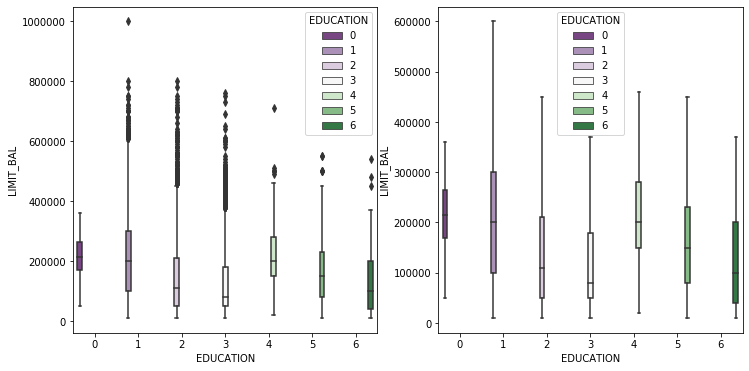

In [44]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="EDUCATION", y="LIMIT_BAL", hue="EDUCATION",data=df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="EDUCATION", y="LIMIT_BAL", hue="EDUCATION",data=df, palette="PRGn",showfliers=False)
plt.show();

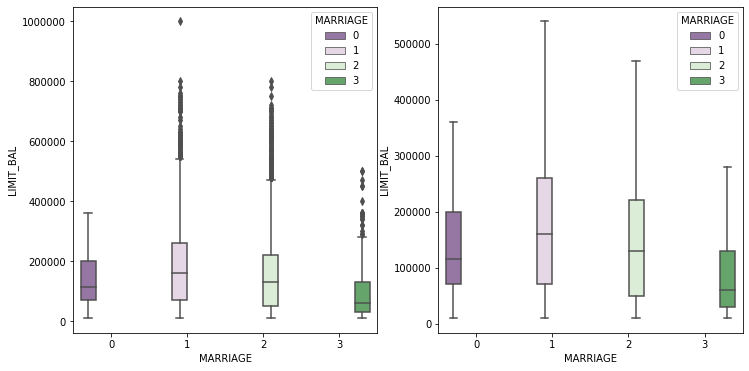

In [45]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="MARRIAGE", y="LIMIT_BAL", hue="MARRIAGE",data=df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="MARRIAGE", y="LIMIT_BAL", hue="MARRIAGE",data=df, palette="PRGn",showfliers=False)
plt.show();

In [46]:
X = df[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 
       'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 
       'BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
y = np.array(df[['default payment next month']]).ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.15, random_state=0)
X_train2, X_val2, y_train2, y_val2 = train_test_split(X_train2, y_train2, test_size=0.15, random_state=0)

In [47]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

print(X_train2.shape)
print(X_val2.shape)
print(X_test2.shape)

(14700, 23)
(6300, 23)
(9000, 23)
(21675, 23)
(3825, 23)
(4500, 23)


## KNN

In [48]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)

print('Training set score:', clf.score(X_train, y_train))
print('Validation set score:', clf.score(X_val, y_val))
print('Testing set score:', clf.score(X_test, y_test))

Training set score: 0.8175510204081633
Validation set score: 0.7496825396825397
Testing set score: 0.758


In [49]:
# decrease n neighbors
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
print("for n = 3:")
print('Training set score:', clf.score(X_train, y_train))
print('Validation set score:', clf.score(X_val, y_val))
print('Testing set score:', clf.score(X_test, y_test))

# decrease n neighbors
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, y_train)
print("for n = 1:")
print('Training set score:', clf.score(X_train, y_train))
print('Validation set score:', clf.score(X_val, y_val))
print('Testing set score:', clf.score(X_test, y_test))

for n = 3:
Training set score: 0.8392517006802721
Validation set score: 0.7366666666666667
Testing set score: 0.7337777777777778
for n = 1:
Training set score: 0.9998639455782313
Validation set score: 0.6895238095238095
Testing set score: 0.6945555555555556


In [50]:
# increase n neighbors
clf = KNeighborsClassifier(n_neighbors=7)
clf.fit(X_train, y_train)
print("for n = 7:")
print('Training set score:', clf.score(X_train, y_train))
print('Validation set score:', clf.score(X_val, y_val))
print('Testing set score:', clf.score(X_test, y_test))

# increase n neighbors
clf = KNeighborsClassifier(n_neighbors=9)
clf.fit(X_train, y_train)
print("for n = 9:")
print('Training set score:', clf.score(X_train, y_train))
print('Validation set score:', clf.score(X_val, y_val))
print('Testing set score:', clf.score(X_test, y_test))

# increase n neighbors
clf = KNeighborsClassifier(n_neighbors=11)
clf.fit(X_train, y_train)
print("for n = 11:")
print('Training set score:', clf.score(X_train, y_train))
print('Validation set score:', clf.score(X_val, y_val))
print('Testing set score:', clf.score(X_test, y_test))

for n = 7:
Training set score: 0.8027210884353742
Validation set score: 0.7541269841269841
Testing set score: 0.7653333333333333
for n = 9:
Training set score: 0.7979591836734694
Validation set score: 0.7614285714285715
Testing set score: 0.7708888888888888
for n = 11:
Training set score: 0.793469387755102
Validation set score: 0.763015873015873
Testing set score: 0.7701111111111111


In [51]:
# n_neigbhors = 9
clf = KNeighborsClassifier(n_neighbors=9)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("for n = 9:")
print('Training set score:', clf.score(X_train, y_train))
print('Validation set score:', clf.score(X_val, y_val))
print('Testing set score:', clf.score(X_test, y_test))

for n = 9:
Training set score: 0.7979591836734694
Validation set score: 0.7614285714285715
Testing set score: 0.7708888888888888


In [52]:
print(confusion_matrix(y_test, y_pred))
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("accuracy:", (tn+tp)/(tn+fp+fn+tp))
print("precision class 0:", tn/(tn+fn))
print("precision class 1:", tp/(tp+fp))
print("recall class 0:", tn/(tn+fp))
print("recall class 1:", tp/(tp+fn))

[[6636  424]
 [1638  302]]
accuracy: 0.7708888888888888
precision class 0: 0.8020304568527918
precision class 1: 0.41597796143250687
recall class 0: 0.939943342776204
recall class 1: 0.1556701030927835


In [53]:
tn, fp, fn, tp


(6636, 424, 1638, 302)

## Linear Models

In [54]:
# Linear Regression

clf = LinearRegression().fit(X_train, y_train)

print('Training set score:', clf.score(X_train, y_train))
print('Validation set score:', clf.score(X_val, y_val))
print('Testing set score:', clf.score(X_test, y_test))

Training set score: 0.12092337391942576
Validation set score: 0.126314507368683
Testing set score: 0.12129366731987268


In [55]:
# Ridge Regression

clf = Ridge().fit(X_train, y_train)

print('Training set score:', clf.score(X_train, y_train))
print('Validation set score:', clf.score(X_val, y_val))
print('Testing set score:', clf.score(X_test, y_test))

Training set score: 0.12092337349629922
Validation set score: 0.1263141550243242
Testing set score: 0.12129283924333345


In [65]:
# Logistic Regression

clf = LogisticRegression(solver='lbfgs', max_iter=1000, penalty='l2')
clf.fit(X_train, y_train)

print('Training set score:', clf.score(X_train, y_train))
print('Validation set score:', clf.score(X_val, y_val))
print('Testing set score:', clf.score(X_test, y_test))

Training set score: 0.7756462585034014
Validation set score: 0.7777777777777778
Testing set score: 0.7845555555555556


In [66]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("accuracy:", (tn+tp)/(tn+fp+fn+tp))
print("precision class 0:", tn/(tn+fn))
print("precision class 1:", tp/(tp+fp))
print("recall class 0:", tn/(tn+fp))
print("recall class 1:", tp/(tp+fn))

[[7060    0]
 [1939    1]]
accuracy: 0.7845555555555556
precision class 0: 0.7845316146238471
precision class 1: 1.0
recall class 0: 1.0
recall class 1: 0.0005154639175257732


## Random Forest

In [58]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

print('Training set score:', clf.score(X_train, y_train))
print('Validation set score:', clf.score(X_val, y_val))
print('Testing set score:', clf.score(X_test, y_test))

Training set score: 0.9997959183673469
Validation set score: 0.816031746031746
Testing set score: 0.8158888888888889


In [59]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train2, y_train2)

print('Training set score:', clf.score(X_train2, y_train2))
print('Validation set score:', clf.score(X_val2, y_val2))
print('Testing set score:', clf.score(X_test2, y_test2))

Training set score: 0.9994463667820069
Validation set score: 0.8151633986928104
Testing set score: 0.8211111111111111


In [60]:
clf = RandomForestClassifier(n_estimators=1000)
clf.fit(X_train, y_train)

print('Training set score:', clf.score(X_train, y_train))
print('Validation set score:', clf.score(X_val, y_val))
print('Testing set score:', clf.score(X_test, y_test))

Training set score: 0.9998639455782313
Validation set score: 0.8177777777777778
Testing set score: 0.8187777777777778


In [61]:
clf = RandomForestClassifier(n_estimators=1000)
clf.fit(X_train2, y_train2)

print('Training set score:', clf.score(X_train2, y_train2))
print('Validation set score:', clf.score(X_val2, y_val2))
print('Testing set score:', clf.score(X_test2, y_test2))

Training set score: 0.9994925028835063
Validation set score: 0.8177777777777778
Testing set score: 0.8215555555555556


In [62]:
y_pred = clf.predict(X_test2)
print(confusion_matrix(y_test2, y_pred))
tn, fp, fn, tp = confusion_matrix(y_test2, y_pred).ravel()
print("accuracy:", (tn+tp)/(tn+fp+fn+tp))
print("precision class 0:", tn/(tn+fn))
print("precision class 1:", tp/(tp+fp))
print("recall class 0:", tn/(tn+fp))
print("recall class 1:", tp/(tp+fn))

[[3343  186]
 [ 617  354]]
accuracy: 0.8215555555555556
precision class 0: 0.8441919191919192
precision class 1: 0.6555555555555556
recall class 0: 0.9472938509492774
recall class 1: 0.364572605561277


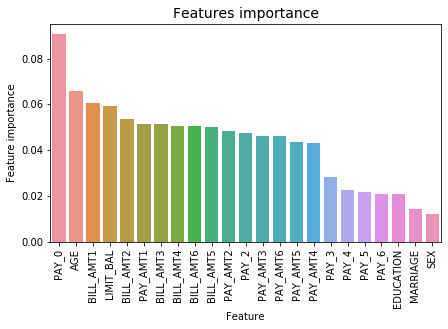

In [63]:
predictors = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 
              'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 
              'BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
              'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()  